In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from IPython.core import display as ICD
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
supply_raw = pd.read_excel('Supply Chain Deliveries.xlsx')
supply_raw.head(5)

,Document,REV,DESCRIPTION,SUPPLIER_LOCATION,SUPPLIER_POSTAL_CODE,SUPPLIER_COUNTRY,DESC_REV_FRGT_TERMS,LINE_NUMBER,SUB_LINE_NUMBER,SHIP_GROUP,DESTINATION,QTY_TRACKED,ITEM_PRIME_ID,PO_PRIME_ID,MATERIAL_TYPE,ITEM_CODE,BULK_SIZE,ABBREV_DESCR,PO_CREATED,PO_LAST_UPDATED,PO_ISSUED,LINE_SOP_DATE,LINE_RAS_DATE,SUPPLIER_LAST_CONTACT,SUPPLIER_NEXT_CONTACT,KEY_MILESTONE_DESCR_SCP,SCP_DATE,KEY_MILESTONE_DESCR_POA,POA_DATE,KEY_MILESTONE_DESCR_ETA,ETA_DATE,KEY_MILESTONE_DESCR_MRR,MRR_DATE,MILESTONE_1_NAME,MILESTONE_1_SCHEDULE,MILESTONE_1_ACTUALIZED,MILESTONE_1_PROJECTED,MILESTONE_1_FORECASTED,MILESTONE_1_DEPENDENT,MILESTONE_1_DEP_ACTUALIZED,MILESTONE_1_SCHEDULE_WEIGHT,MILESTONE_2_NAME,MILESTONE_2_SCHEDULE,MILESTONE_2_ACTUALIZED,MILESTONE_2_PROJECTED,MILESTONE_2_FORECASTED,MILESTONE_2_DEPENDENT,MILESTONE_2_DEP_ACTUALIZED,MILESTONE_2_SCHEDULE_WEIGHT,MILESTONE_3_NAME,MILESTONE_3_SCHEDULE,MILESTONE_3_ACTUALIZED,MILESTONE_3_PROJECTED,MILESTONE_3_FORECASTED,MILESTONE_3_DEPENDENT,MILESTONE_3_DEP_ACTUALIZED,MILESTONE_3_SCHEDULE_WEIGHT,MILESTONE_4_NAME,MILESTONE_4_SCHEDULE,MILESTONE_4_ACTUALIZED,MILESTONE_4_PROJECTED,MILESTONE_4_FORECASTED,MILESTONE_4_DEPENDENT,MILESTONE_4_DEP_ACTUALIZED,MILESTONE_4_SCHEDULE_WEIGHT,MILESTONE_5_NAME,MILESTONE_5_SCHEDULE,MILESTONE_5_ACTUALIZED,MILESTONE_5_PROJECTED,MILESTONE_5_FORECASTED,MILESTONE_5_DEPENDENT,MILESTONE_5_DEP_ACTUALIZED,MILESTONE_5_SCHEDULE_WEIGHT,MILESTONE_6_NAME,MILESTONE_6_SCHEDULE,MILESTONE_6_ACTUALIZED,MILESTONE_6_PROJECTED,MILESTONE_6_FORECASTED,MILESTONE_6_DEPENDENT,MILESTONE_6_DEP_ACTUALIZED,MILESTONE_6_SCHEDULE_WEIGHT,MILESTONE_7_NAME,MILESTONE_7_SCHEDULE,MILESTONE_7_ACTUALIZED,MILESTONE_7_PROJECTED,MILESTONE_7_FORECASTED,MILESTONE_7_DEPENDENT,MILESTONE_7_DEP_ACTUALIZED,MILESTONE_7_SCHEDULE_WEIGHT,MILESTONE_8_NAME,MILESTONE_8_SCHEDULE,MILESTONE_8_ACTUALIZED,MILESTONE_8_PROJECTED,MILESTONE_8_FORECASTED,MILESTONE_8_DEPENDENT,MILESTONE_8_DEP_ACTUALIZED,MILESTONE_8_SCHEDULE_WEIGHT,MILESTONE_9_NAME,MILESTONE_9_SCHEDULE,MILESTONE_9_ACTUALIZED,MILESTONE_9_PROJECTED,MILESTONE_9_FORECASTED,MILESTONE_9_DEPENDENT,MILESTONE_9_DEP_ACTUALIZED,MILESTONE_9_SCHEDULE_WEIGHT,MILESTONE_10_NAME,MILESTONE_10_SCHEDULE,MILESTONE_10_ACTUALIZED,MILESTONE_10_PROJECTED,MILESTONE_10_FORECASTED,MILESTONE_10_DEPENDENT,MILESTONE_10_DEP_ACTUALIZED,MILESTONE_10_SCHEDULE_WEIGHT,SHIP_POINT,SHIP_POINT_COUNTRY,SHIP_GROUP_STATUS,SHIP_GROUP_STATUS_DESCR,SHIP_GROUP_TYPE,SHIP_GROUP_TYEP_DESCR,MULTI_PROJECT_ID,IN_DOC_REV_PK,RECEIVING_ONLY_PO,KEY_MILESTONE_DESCR_LOG0,LOG0_STATUS_DATE,KEY_MILESTONE_DESCR_LOG1,LOG1_STATUS_DATE,KEY_MILESTONE_DESCR_LOG2,LOG2_STATUS_DATE,KEY_MILESTONE_DESCR_INMY,INMY_STATUS_DATE,KEY_MILESTONE_DESCR_OUTMY,OUTMY_STATUS_DATE,CURRENT_MILESTONE,CURRENT_MILESTONE_STATUS_DATE,BOM_UOM_FK,QTY_RECEIVED,QTY_ORDERED
0,D1357,7,ELECTRICAL BULK MATERIAL,HOUSTON,77040,US,NaN,135,0,9-6000-RR/CO 4-3,FLD,350,6,9,B,617406035CA,<2 x 25mm2 +E>,"CABLE POWER 0,6/1KV MULTI-CORE + EARTH ARMORED",2012-04-09,2012-04-26,2012-04-09,2011-11-08,2011-10-20,NaT,NaT,Supplier Current Promise,2011-12-06,NaN,NaN,Estimated Time Of Arrival,2012-01-17,Material Received Report,2012-01-17,PO ISSUED,2011-12-01,2011-11-01,NaN,NaT,NaN,NaN,NaN,SRN ISSUED,2011-12-01,2011-12-05,NaT,NaT,NaN,NaN,NaN,FCA SUPPLIER SHOP,2011-12-02,2011-12-06,NaT,NaT,NaN,NaN,NaN,AT PACKER,2011-12-06,2011-12-06,NaT,NaT,NaN,NaT,NaN,IN TRANSIT-AIR,2011-12-13,2011-12-16,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaN,ARRIVED CUSTOMS,2011-12-15,2011-12-16,NaT,NaT,NaT,NaT,NaN,ETA SITE,2012-01-02,2012-01-17,NaT,NaT,NaT,NaT,NaN,MRR,2012-01-06,2012-01-17,NaT,NaT,NaN,NaN,NaN,SEOUL,KR,C,Closed,E,Expedited Item,1,7,N,NaN,NaN,LOG1,2011-12-16,NaN,NaT,Inside the Marshalling yard,2011-12-06,Out of Marshalling Yard,2011-12-16,Shipgroup Closed,NaT,M,350,350
1,D615,0,PIPING VALVES- CARBON AND STAINLESS STEEL,HOUSTON,77013,US,NaN,1,0,PRO 14404 / 00184825 : 5-0001-B2-009/SRN HOU-02/ PSP,PSP,2,5,5,B,PAB5111GL21Z000A,1,YTAB5 GLOBE 800# SW BB A350-LF2,2009-04-08,2011-

In [3]:
#Get NAs
null = pd.DataFrame(supply_raw.isnull().sum())
print('Shape: {}\n\nNulls:'.format(supply_raw.shape))
display(null)

Shape: (93379, 137)

Nulls:


,0
Document,0
REV,0
DESCRIPTION,0
SUPPLIER_LOCATION,116
SUPPLIER_POSTAL_CODE,1724
SUPPLIER_COUNTRY,116
DESC_REV_FRGT_TERMS,92263
LINE_NUMBER,0
SUB_LINE_NUMBER,0
SHIP_GROUP,0


In [4]:
#Trim columns
#Keepers
cols = ['MILESTONE_10_SCHEDULE','MILESTONE_10_ACTUALIZED',
        'SUPPLIER_COUNTRY',
        'DESTINATION','QTY_TRACKED','MATERIAL_TYPE',
        'PO_CREATED','PO_ISSUED',
        'LINE_SOP_DATE','LINE_RAS_DATE',
        'SCP_DATE','ETA_DATE',
        'MILESTONE_1_SCHEDULE','MILESTONE_1_ACTUALIZED',
        'MILESTONE_2_SCHEDULE','MILESTONE_2_ACTUALIZED',
        'MILESTONE_3_SCHEDULE','MILESTONE_3_ACTUALIZED']

supply = supply_raw[cols]
supply.head(5)

,MILESTONE_10_SCHEDULE,MILESTONE_10_ACTUALIZED,SUPPLIER_COUNTRY,DESTINATION,QTY_TRACKED,MATERIAL_TYPE,PO_CREATED,PO_ISSUED,LINE_SOP_DATE,LINE_RAS_DATE,SCP_DATE,ETA_DATE,MILESTONE_1_SCHEDULE,MILESTONE_1_ACTUALIZED,MILESTONE_2_SCHEDULE,MILESTONE_2_ACTUALIZED,MILESTONE_3_SCHEDULE,MILESTONE_3_ACTUALIZED
0,2012-01-06,2012-01-17,US,FLD,350,B,2012-04-09,2012-04-09,2011-11-08,2011-10-20,2011-12-06,2012-01-17,2011-12-01,2011-11-01,2011-12-01,2011-12-05,2011-12-02,2011-12-06
1,2009-05-24,2009-08-24,US,PSP,2,B,2009-04-08,2009-04-14,2009-05-29,2009-06-01,NaT,NaT,2009-04-14,2009-04-14,2009-04-14,2009-06-25,NaT,NaT
2,2009-07-11,2009-09-13,KP,FLD,72,B,2009-06-04,2009-06-05,2009-06-10,2009-04-24,2009-06-20,2009-09-13,2009-06-05,2009-06-05,2009-06-05,2009-06-20,2009-06-06,2009-06-20
3,2009-07-11,2009-09-13,KP,FLD,36,B,2009-06-04,2009-06-05,2009-06-10,2009-04-24,2009-06-20,2009-09-13,2009-06-05,2009-06-05,2009-06-05,2009-06-20,2009-06-06,2009-06-20
4,2012-01-06,2012-01-17,US,FLD,100,B,2012-04-09,2012-04-09,2011-11-08,2011-10-20,2011-12-06,2012-01-17,2011-12-01,2011-11-01,2011-12-01,2011-12-05,2011-12-02,2011-12-06


In [5]:
#Pair dates to create delta cols
delta_pairs = [['MILESTONE_10_SCHEDULE','MILESTONE_10_ACTUALIZED'],
               ['MILESTONE_1_SCHEDULE','MILESTONE_1_ACTUALIZED'],
               ['MILESTONE_2_SCHEDULE','MILESTONE_2_ACTUALIZED'],
               ['MILESTONE_3_SCHEDULE','MILESTONE_3_ACTUALIZED'],
               ['PO_ISSUED','PO_CREATED'],
               ['MILESTONE_10_SCHEDULE','MILESTONE_1_SCHEDULE'],
               ['LINE_SOP_DATE','MILESTONE_1_ACTUALIZED'],
               ['LINE_SOP_DATE','MILESTONE_2_ACTUALIZED'],
               ['LINE_RAS_DATE','MILESTONE_1_ACTUALIZED'],
               ['LINE_RAS_DATE','MILESTONE_2_ACTUALIZED'],
               ['ETA_DATE','SCP_DATE']]


In [6]:
#funtion to do delta time columns and return names for later
def MakeTimeDeltaCols(df,pairs,spec_name=False):
    #df is pandas df,pairs is list of col names [[col1, col2],[col3, col4]]
    #for positive output, put larger col first
    names = []
    for pair in pairs:
        first = True
        for col in pair:
            if first == True:
                dt1 = col
                first = False
            else:
                dt2 = col

        if spec_name == False:
            delta_name = 'DELTA({},{})'.format(dt1,dt2)
            df[delta_name] = df[dt1]-df[dt2]
        else:
            df[spec_name] = df[dt1]-df[dt2]
        names.append(delta_name)

In [7]:
MakeTimeDeltaCols(df=supply,pairs=delta_pairs)

In [8]:
#rename deltas
name_dic = {'DELTA(MILESTONE_10_SCHEDULE,MILESTONE_10_ACTUALIZED)':'MS10_Delta',
            'DELTA(MILESTONE_1_SCHEDULE,MILESTONE_1_ACTUALIZED)':'MS1_Delta',
            'DELTA(MILESTONE_2_SCHEDULE,MILESTONE_2_ACTUALIZED)':'MS2_Delta',
            'DELTA(MILESTONE_3_SCHEDULE,MILESTONE_3_ACTUALIZED)':'MS3_Delta',
            'DELTA(PO_ISSUED,PO_CREATED)':'PO_Delta',
            'DELTA(MILESTONE_10_SCHEDULE,MILESTONE_1_SCHEDULE)':'Schd_Rng',
            'DELTA(LINE_SOP_DATE,MILESTONE_1_ACTUALIZED)':'SOP-MS1_Delta',
            'DELTA(LINE_SOP_DATE,MILESTONE_2_ACTUALIZED)':'SOP-MS2_Delta',
            'DELTA(LINE_RAS_DATE,MILESTONE_1_ACTUALIZED)':'RAS-MS1_Delta',
            'DELTA(LINE_RAS_DATE,MILESTONE_2_ACTUALIZED)':'RAS-MS2_Delta',
            'DELTA(ETA_DATE,SCP_DATE)':'ETA-SCP_Delta'}

supply.rename(columns = name_dic, inplace = True)

In [9]:
dt_names = ['MS10_Delta', 'MS1_Delta', 'MS2_Delta', 'MS3_Delta',
            'PO_Delta', 'Schd_Rng', 'SOP-MS1_Delta',
            'SOP-MS2_Delta', 'RAS-MS1_Delta', 'RAS-MS2_Delta',
            'ETA-SCP_Delta']

In [10]:
#Convert timedelta objects to number
import datetime as dt

for col in dt_names:
    supply[col] = supply[col].dt.components.days

In [11]:
#drop dates, keep deltas
cols = ['MILESTONE_10_SCHEDULE','MILESTONE_10_ACTUALIZED',
        'MILESTONE_1_SCHEDULE','MILESTONE_1_ACTUALIZED',
        'MILESTONE_2_SCHEDULE','MILESTONE_2_ACTUALIZED',
        'MILESTONE_3_SCHEDULE','MILESTONE_3_ACTUALIZED',
        'PO_ISSUED','PO_CREATED',
        'LINE_SOP_DATE','LINE_RAS_DATE',
        'SCP_DATE','ETA_DATE']
supply.drop(cols, axis=1, inplace=True)
supply.head(5)

,SUPPLIER_COUNTRY,DESTINATION,QTY_TRACKED,MATERIAL_TYPE,MS10_Delta,MS1_Delta,MS2_Delta,MS3_Delta,PO_Delta,Schd_Rng,SOP-MS1_Delta,SOP-MS2_Delta,RAS-MS1_Delta,RAS-MS2_Delta,ETA-SCP_Delta
0,US,FLD,350,B,-11.0,30.0,-4.0,-4.0,0.0,36,7.0,-27.0,-12.0,-46.0,42.0
1,US,PSP,2,B,-92.0,0.0,-72.0,NaN,6.0,40,45.0,-27.0,48.0,-24.0,NaN
2,KP,FLD,72,B,-64.0,0.0,-15.0,-14.0,1.0,36,5.0,-10.0,-42.0,-57.0,85.0
3,KP,FLD,36,B,-64.0,0.0,-15.0,-14.0,1.0,36,5.0,-10.0,-42.0,-57.0,85.0
4,US,FLD,100,B,-11.0,30.0,-4.0,-4.0,0.0,36,7.0,-27.0,-12.0,-46.0,42.0


In [12]:
#recheck nulls
null = pd.DataFrame(supply.isnull().sum())
print('Shape: {}\n\nNulls:'.format(supply.shape))
display(null)

Shape: (93379, 15)

Nulls:


,0
SUPPLIER_COUNTRY,116
DESTINATION,0
QTY_TRACKED,0
MATERIAL_TYPE,0
MS10_Delta,6467
MS1_Delta,11
MS2_Delta,10801
MS3_Delta,16994
PO_Delta,608
Schd_Rng,0


In [13]:
#Take care of nulls
#drop rows if any of cols are Nan
supply.dropna(inplace = True)

#recheck for shape and nulls
null = pd.DataFrame(supply.isnull().sum())
print('Shape: {}\n\nNulls:'.format(supply.shape))
display(null)

Shape: (60448, 15)

Nulls:


,0
SUPPLIER_COUNTRY,0
DESTINATION,0
QTY_TRACKED,0
MATERIAL_TYPE,0
MS10_Delta,0
MS1_Delta,0
MS2_Delta,0
MS3_Delta,0
PO_Delta,0
Schd_Rng,0


In [14]:
#Correlation
#Store continuous columns
cont_cols = ['MS10_Delta', 'QTY_TRACKED', 
             'MS1_Delta', 'MS2_Delta', 'MS3_Delta', 
             'PO_Delta', 'Schd_Rng',
             'SOP-MS1_Delta', 'SOP-MS2_Delta', 
             'RAS-MS1_Delta', 'RAS-MS2_Delta', 
             'ETA-SCP_Delta']

#create df with only continuous vars
supply_corr = supply[cont_cols]
#compute correlations
correlations = supply_corr.corr()
correlations['MS10_Delta'].sort_values(ascending=False)

MS10_Delta       1.000000
MS3_Delta        0.698106
MS2_Delta        0.697656
SOP-MS2_Delta    0.284479
MS1_Delta        0.148603
PO_Delta         0.010140
QTY_TRACKED     -0.001909
RAS-MS2_Delta   -0.028097
Schd_Rng        -0.141169
ETA-SCP_Delta   -0.355669
SOP-MS1_Delta   -0.544866
RAS-MS1_Delta   -0.563517
Name: MS10_Delta, dtype: float64

In [15]:
#Create Milestone 10 catagories
#(Ontime, 7dayL, 30dayL, 90dayL, 90+dayL)
col = 'MS10_Delta'
bins = [np.NINF, -90.1, -30.1, -7.1, -1, np.inf]
labels = ['>90dayL', '30-90dayL', '7-30dayL', '1-7dayL', 'on-time']
supply[col] = pd.cut(supply[col],
                     bins = bins,
                     labels = labels)
supply.head(5)

,SUPPLIER_COUNTRY,DESTINATION,QTY_TRACKED,MATERIAL_TYPE,MS10_Delta,MS1_Delta,MS2_Delta,MS3_Delta,PO_Delta,Schd_Rng,SOP-MS1_Delta,SOP-MS2_Delta,RAS-MS1_Delta,RAS-MS2_Delta,ETA-SCP_Delta
0,US,FLD,350,B,7-30dayL,30.0,-4.0,-4.0,0.0,36,7.0,-27.0,-12.0,-46.0,42.0
2,KP,FLD,72,B,30-90dayL,0.0,-15.0,-14.0,1.0,36,5.0,-10.0,-42.0,-57.0,85.0
3,KP,FLD,36,B,30-90dayL,0.0,-15.0,-14.0,1.0,36,5.0,-10.0,-42.0,-57.0,85.0
4,US,FLD,100,B,7-30dayL,30.0,-4.0,-4.0,0.0,36,7.0,-27.0,-12.0,-46.0,42.0
5,KP,FLD,36,B,30-90dayL,0.0,-15.0,-14.0,1.0,36,5.0,-10.0,-42.0,-57.0,85.0


Text(0, 0.5, 'occurances')

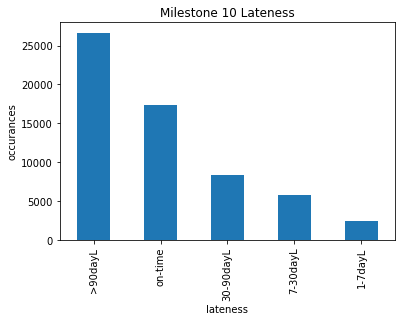

In [16]:
#histogram of Milestone 10 lateness
col = 'MS10_Delta'
supply[col].value_counts().plot(kind='bar')
plt.title('Milestone 10 Lateness')
plt.xlabel('lateness')
plt.ylabel('occurances')

In [17]:
def MultiColHists(df,cols):
    #df as pandas df, cols as list of columns as strings
    num_cols = len(cols)
    sqr = np.ceil(num_cols**.5)
    plt.figure(figsize = (10,10))
    for i in range(num_cols):
        plt.subplot(sqr, sqr, i+1)
        plt.hist(df[cols[i]])
        plt.ylabel('occurances')
        plt.title(cols[i])
    plt.show()

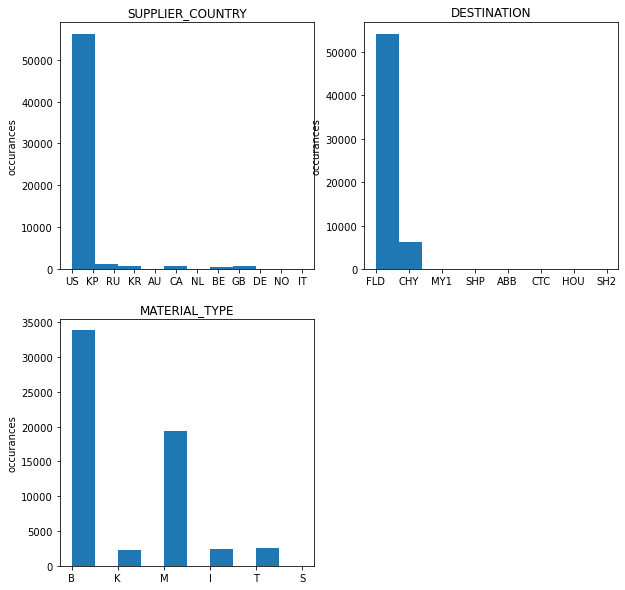

In [18]:
#histogram of other catagoricals
cat_cols = ['SUPPLIER_COUNTRY', 'DESTINATION', 'MATERIAL_TYPE']

MultiColHists(df = supply, cols = cat_cols) 

In [19]:
#describe numerical columns (send to csv for better presentation)
NumSummary = supply.describe()
NumSummary.to_csv('describe.out.csv')

In [20]:
#Convert Catagoricals to Binary
supply = pd.get_dummies(supply, columns = cat_cols)

In [21]:
#Create X and Y
x = supply.drop('MS10_Delta', axis=1)
y = supply['MS10_Delta']

#Create miniture X and Y for faster param analysis
supply_mini = supply.sample(frac = 0.1)
x_mini = supply_mini.drop('MS10_Delta', axis=1)
y_mini = supply_mini['MS10_Delta']

#Check shapes
xshape = x.shape
yshape = y.shape
xmshape = x_mini.shape
ymshape = y_mini.shape
print('DF:    |  Shape:\nx      | {}\ny      | {}\nx_mini | {}\ny_mini | {}'.format(xshape,yshape,xmshape,ymshape))

DF:    |  Shape:
x      | (60448, 37)
y      | (60448,)
x_mini | (6045, 37)
y_mini | (6045,)


In [22]:
#Save the column names for input later
binary_columns = list(x.columns)
binary_columns

['QTY_TRACKED',
 'MS1_Delta',
 'MS2_Delta',
 'MS3_Delta',
 'PO_Delta',
 'Schd_Rng',
 'SOP-MS1_Delta',
 'SOP-MS2_Delta',
 'RAS-MS1_Delta',
 'RAS-MS2_Delta',
 'ETA-SCP_Delta',
 'SUPPLIER_COUNTRY_AU',
 'SUPPLIER_COUNTRY_BE',
 'SUPPLIER_COUNTRY_CA',
 'SUPPLIER_COUNTRY_DE',
 'SUPPLIER_COUNTRY_GB',
 'SUPPLIER_COUNTRY_IT',
 'SUPPLIER_COUNTRY_KP',
 'SUPPLIER_COUNTRY_KR',
 'SUPPLIER_COUNTRY_NL',
 'SUPPLIER_COUNTRY_NO',
 'SUPPLIER_COUNTRY_RU',
 'SUPPLIER_COUNTRY_US',
 'DESTINATION_ABB',
 'DESTINATION_CHY',
 'DESTINATION_CTC',
 'DESTINATION_FLD',
 'DESTINATION_HOU',
 'DESTINATION_MY1',
 'DESTINATION_SH2',
 'DESTINATION_SHP',
 'MATERIAL_TYPE_B',
 'MATERIAL_TYPE_I',
 'MATERIAL_TYPE_K',
 'MATERIAL_TYPE_M',
 'MATERIAL_TYPE_S',
 'MATERIAL_TYPE_T']

In [23]:
#Scale Data
from sklearn.preprocessing import StandardScaler

#Remove Y from continuous columns
cont_cols.remove('MS10_Delta')

#scale continuous columns
scaler = StandardScaler()
x[cont_cols] = scaler.fit_transform(x[cont_cols])
x_mini[cont_cols] = scaler.fit_transform(x_mini[cont_cols])

In [24]:
#Save Preprocessed data into csv
from numpy import savetxt

#Prescaled x column names
with open('BinColNames.txt', 'w') as file:
    file.writelines("%s\n" % name for name in binary_columns)

#Full dataset
savetxt('PreprocX.csv', x, delimiter=',')
y.to_csv('PreprocY.csv')

#Mini dataset
savetxt('PreprocXmini.csv', x_mini, delimiter=',')
y_mini.to_csv('PreprocYmini.csv')